In [9]:
import sys
sys.path += ["../"]

from src.interfaces.nats_interface import NATS_Interface as NATS_Searchspace
from icecream import ic
from custom_env.oscar import OscarEnv
from utils import NASIndividual

searchspace = NATS_Searchspace(target_device="edgegpu")
env = OscarEnv(searchspace_api=searchspace, weights=[0.3, 0.7])


In [10]:
def process_network_pool(architecture_string):
    architecture_encoded = env.searchspace.encode_architecture(architecture_string)
    empty_individual = NASIndividual(architecture=None, index=None, architecture_string_to_idx=env.searchspace.architecture_to_index)
    
    return env.mount_architecture(empty_individual, architecture_encoded)

individuals_pool = list(map(process_network_pool, env.networks_pool))

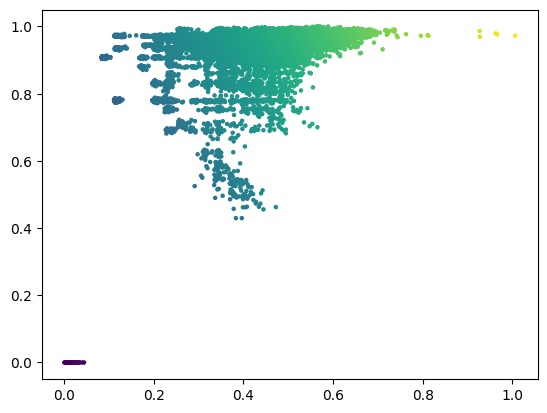

In [11]:
import matplotlib.pyplot as plt

x_coordinates = list(map(env.reward_handler.get_normalized_latency, individuals_pool))
y_coordinates = list(map(env.reward_handler.get_normalized_accuracy, individuals_pool))

c = list(map(lambda x: env.reward_handler.fitness_function(x).fitness, individuals_pool))

fig, ax = plt.subplots()

ax.scatter(
        x_coordinates,
        y_coordinates,
        s=5,
        c=c, # light gray
        zorder=0
    )